In [102]:
from __future__ import division

import pandas as pd
from pandas import Series,DataFrame
import numpy as np

#Visualisation imports
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline
import pandas_datareader as pdr
pdr.get_data_fred('GS10')
#To grab stock data
from pandas_datareader import data, wb
import pandas_datareader.data as web
from datetime import datetime



In [142]:
tech_list = ['AAPL','GOOG','MSFT','AMZN']

In [143]:
#Setting the end date to today
end = datetime.today()

#Start date set to 1 year back
start = datetime(end.year-1,end.month,end.day)

In [144]:
actions = web.DataReader('GOOG', 'yahoo', start, end)

In [145]:
actions.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-10-05,1488.209961,1464.270020,1466.209961,1486.020020,1113300,1486.020020
2020-10-06,1486.760010,1448.589966,1475.579956,1453.439941,1245400,1453.439941
2020-10-07,1468.959961,1436.000000,1464.290039,1460.290039,1746200,1460.290039
2020-10-08,1490.000000,1465.089966,1465.089966,1485.930054,1187800,1485.930054
2020-10-09,1516.520020,1489.449951,1494.699951,1515.219971,1435300,1515.219971


In [146]:
#Using Yahoo Finance to grab the stock data
for stock in tech_list:
    globals()[stock] =  web.DataReader(stock,'yahoo',start,end) #The globals method sets the stock name to a global variable


In [147]:
AAPL.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-10-05,116.650002,113.550003,113.910004,116.500000,106243800.0,115.755486
2020-10-06,116.120003,112.250000,115.699997,113.160004,161498200.0,112.436829
2020-10-07,115.550003,114.129997,114.620003,115.080002,96849000.0,114.344559
2020-10-08,116.400002,114.589996,116.250000,114.970001,83477200.0,114.235260
2020-10-09,117.000000,114.919998,115.279999,116.970001,100506900.0,116.222481


In [148]:
AAPL.describe()

,High,Low,Open,Close,Volume,Adj Close
count,252.000000,252.000000,252.000000,252.000000,2.520000e+02,252.000000
mean,132.994842,130.175198,131.628453,131.606865,9.675407e+07,131.240016
std,11.105667,11.197460,11.176950,11.183901,3.256242e+07,11.350345
min,110.680000,107.320000,109.110001,108.769997,4.639770e+07,108.074883
25%,124.224998,121.187498,122.864998,122.757498,7.494102e+07,122.311106
50%,131.354996,128.510002,129.800003,130.285004,9.085700e+07,129.985252
75%,144.062500,140.155006,142.042496,142.030003,1.118661e+08,141.833157
max,157.259995,154.389999,156.979996,156.690002,2.623305e+08,156.690002


In [149]:
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 252 entries, 2020-10-05 to 2021-10-04
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       252 non-null    float64
 1   Low        252 non-null    float64
 2   Open       252 non-null    float64
 3   Close      252 non-null    float64
 4   Volume     252 non-null    float64
 5   Adj Close  252 non-null    float64
dtypes: float64(6)
memory usage: 13.8 KB


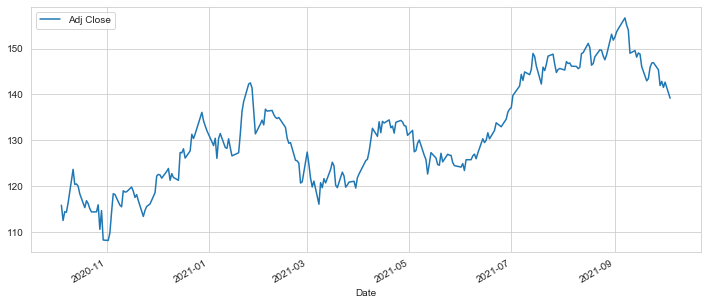

In [150]:
AAPL['Adj Close'].plot(legend=True,figsize=(12,5))


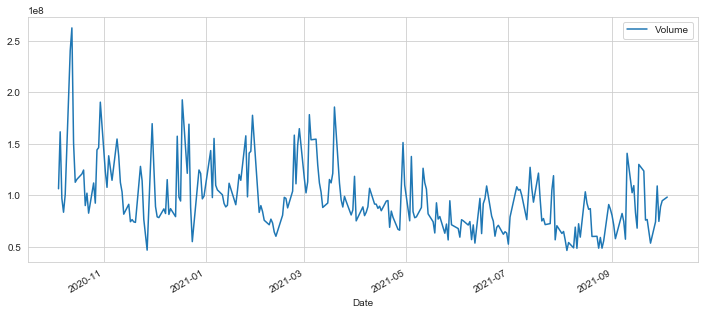

In [151]:
AAPL['Volume'].plot(legend=True,figsize=(12,5))


In [152]:

ma_day = [10,20,50]

for ma in ma_day:
    column_name = "MA for %s days" %(str(ma))
    
    AAPL[column_name] = AAPL['Adj Close'].rolling(window=ma,center=False).mean()


In [153]:
AAPL.tail()


,High,Low,Open,Close,Volume,Adj Close,MA for 10 days,MA for 20 days,MA for 50 days
Date,,,,,,,,,
2021-09-28,144.750000,141.690002,143.250000,141.910004,108972300.0,141.910004,145.712999,149.0965,148.126171
2021-09-29,144.449997,142.029999,142.470001,142.830002,74602000.0,142.830002,145.092999,148.6465,148.064144
2021-09-30,144.380005,141.279999,143.660004,141.500000,88934200.0,141.500000,144.364000,148.0960,147.990494
2021-10-01,142.919998,139.110001,141.899994,142.649994,94639600.0,142.649994,144.023000,147.5460,147.911886
2021-10-04,142.210007,138.270004,141.759995,139.139999,98180300.0,139.139999,143.642999,146.7880,147.727931


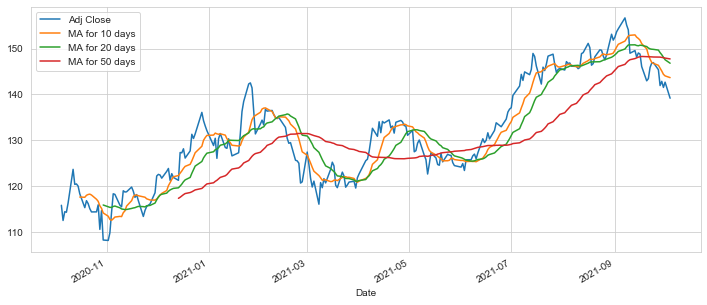

In [154]:
AAPL[['Adj Close','MA for 10 days','MA for 20 days','MA for 50 days']].plot(subplots=False,figsize=(12,5))


In [155]:
AAPL['Daily Return'] = AAPL['Adj Close'].pct_change()


In [156]:
AAPL['Daily Return'].tail()


Date
2021-09-28   -0.023801
2021-09-29    0.006483
2021-09-30   -0.009312
2021-10-01    0.008127
2021-10-04   -0.024606
Name: Daily Return, dtype: float64

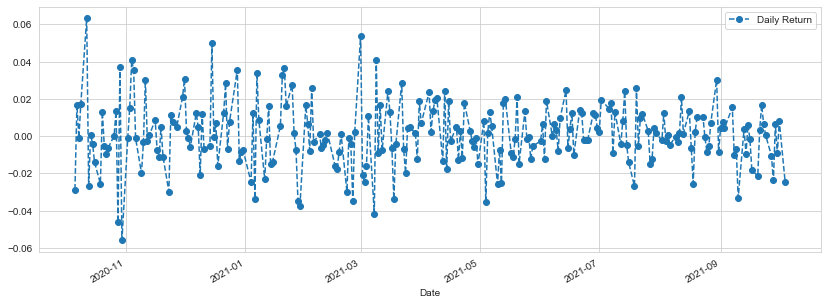

In [157]:
AAPL['Daily Return'].plot(figsize=(14,5),legend=True,linestyle='--',marker='o')


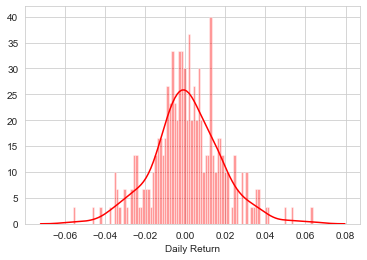

In [158]:
sns.distplot(AAPL['Daily Return'].dropna(),bins=100,color='red')


In [159]:
close_df = web.DataReader(tech_list,'yahoo',start,end)['Adj Close']

In [160]:
close_df.tail()


Symbols,AAPL,GOOG,MSFT,AMZN
Date,,,,
2021-09-28,141.910004,2723.679932,283.519989,3315.959961
2021-09-29,142.830002,2690.419922,284.000000,3301.120117
2021-09-30,141.500000,2665.310059,281.920013,3285.040039
2021-10-01,142.649994,2729.250000,289.100006,3283.260010
2021-10-04,139.139999,2675.300049,283.109985,3189.780029


In [161]:
rets_df = close_df.pct_change()
rets_df.tail()

Symbols,AAPL,GOOG,MSFT,AMZN
Date,,,,
2021-09-28,-0.023801,-0.037576,-0.036204,-0.026379
2021-09-29,0.006483,-0.012211,0.001693,-0.004475
2021-09-30,-0.009312,-0.009333,-0.007324,-0.004871
2021-10-01,0.008127,0.023990,0.025468,-0.000542
2021-10-04,-0.024606,-0.019767,-0.020720,-0.028472


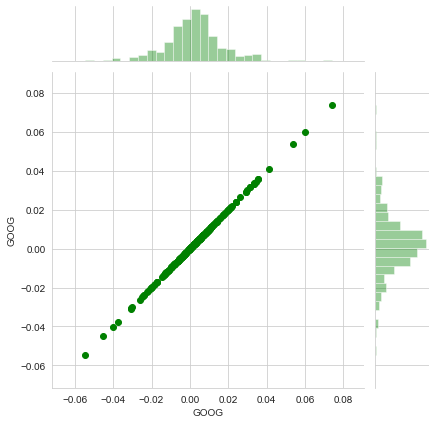

In [162]:
sns.jointplot('GOOG','GOOG',rets_df,kind='scatter',color='green')


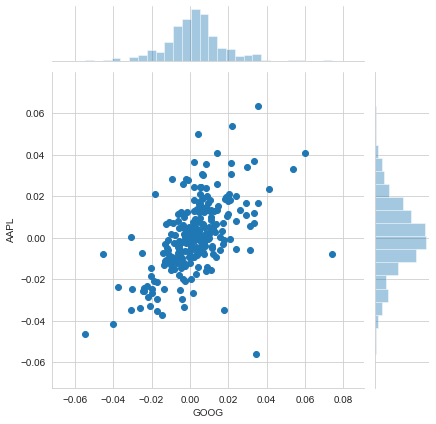

In [163]:
sns.jointplot('GOOG','AAPL',rets_df,kind='scatter')


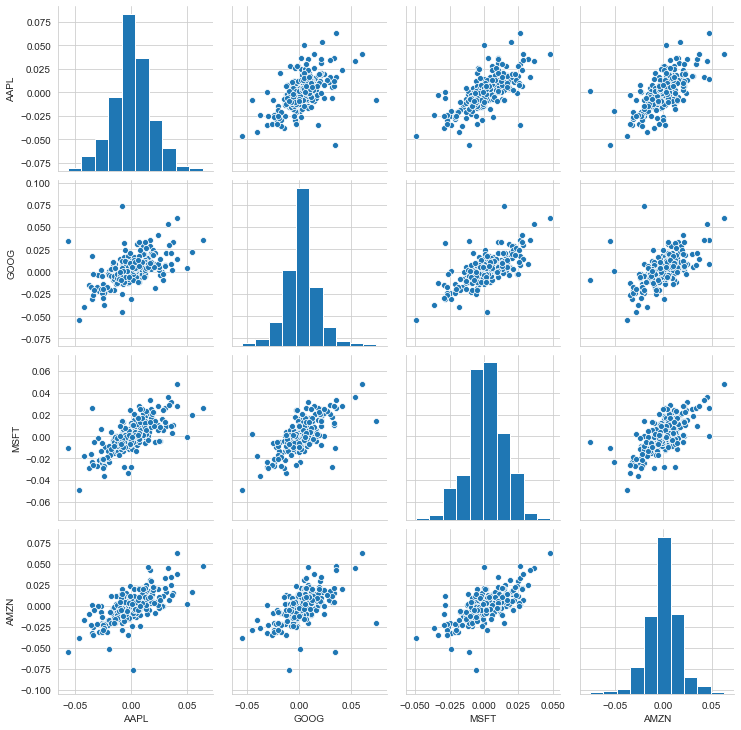

In [164]:
sns.pairplot(rets_df.dropna())

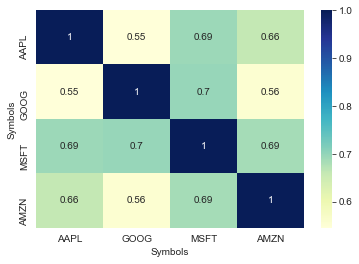

In [165]:
sns.heatmap(rets_df.corr(), cmap="YlGnBu",annot=True)

In [166]:
rets = rets_df.dropna()

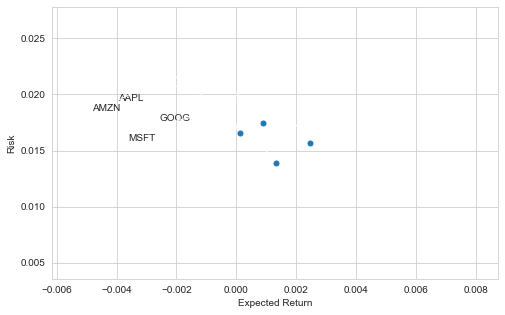

In [167]:
plt.figure(figsize=(8,5))

plt.scatter(rets.mean(),rets.std(),s=25)

plt.xlabel('Expected Return')
plt.ylabel('Risk')


#For adding annotatios in the scatterplot
for label,x,y in zip(rets.columns,rets.mean(),rets.std()):
    plt.annotate(
    label,
    xy=(x,y),xytext=(-120,20),
    textcoords = 'offset points', ha = 'right', va = 'bottom',
    arrowprops = dict(arrowstyle='->',connectionstyle = 'arc3,rad=-0.5') #error line
    )

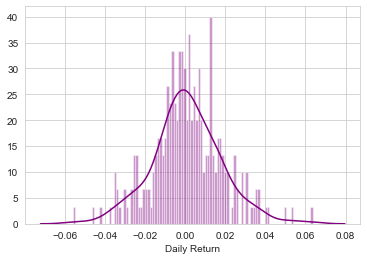

In [168]:
sns.distplot(AAPL['Daily Return'].dropna(),bins=100,color='purple')

In [169]:
rets.head()


Symbols,AAPL,GOOG,MSFT,AMZN
Date,,,,
2020-10-06,-0.028669,-0.021924,-0.021247,-0.031020
2020-10-07,0.016967,0.004713,0.019038,0.030881
2020-10-08,-0.000956,0.017558,0.003574,-0.001608
2020-10-09,0.017396,0.019712,0.024836,0.030120
2020-10-12,0.063521,0.035592,0.025902,0.047550


In [170]:
rets['AAPL'].quantile(0.05)

-0.027791914128286077

In [171]:

days = 365

#delta t
dt = 1/365

mu = rets.mean()['GOOG']

sigma = rets.std()['GOOG']

In [172]:
#Function takes in stock price, number of days to run, mean and standard deviation values
def stock_monte_carlo(start_price,days,mu,sigma):
    
    price = np.zeros(days)
    price[0] = start_price
    
    shock = np.zeros(days)
    drift = np.zeros(days)
    xrange=range
    for x in xrange(1,days):
        
        #Shock and drift formulas taken from the Monte Carlo formula
        shock[x] = np.random.normal(loc=mu*dt,scale=sigma*np.sqrt(dt))
        
        drift[x] = mu * dt
        
        #New price = Old price + Old price*(shock+drift)
        price[x] = price[x-1] + (price[x-1] * (drift[x]+shock[x]))
        
    return price

In [173]:
GOOG.head()


,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-10-05,1488.209961,1464.270020,1466.209961,1486.020020,1113300,1486.020020
2020-10-06,1486.760010,1448.589966,1475.579956,1453.439941,1245400,1453.439941
2020-10-07,1468.959961,1436.000000,1464.290039,1460.290039,1746200,1460.290039
2020-10-08,1490.000000,1465.089966,1465.089966,1485.930054,1187800,1485.930054
2020-10-09,1516.520020,1489.449951,1494.699951,1515.219971,1435300,1515.219971


Text(0.5, 1.0, 'Monte Carlo Analysis for Google')

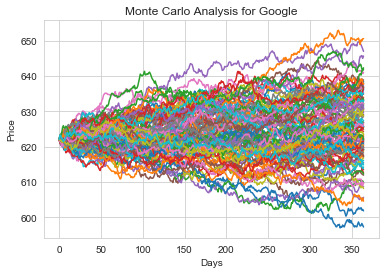

In [174]:

start_price = 622.049 #Taken from above
xrange=range
for run in range(100):
    plt.plot(stock_monte_carlo(start_price,days,mu,sigma))

plt.xlabel('Days')
plt.ylabel('Price')
plt.title('Monte Carlo Analysis for Google')

In [175]:
runs = 10000

simulations = np.zeros(runs)

for run in xrange(runs):
    simulations[run] = stock_monte_carlo(start_price,days,mu,sigma)[days-1]

Text(0.5, 1.0, 'Final price distribution for Google Stock after 365 days')

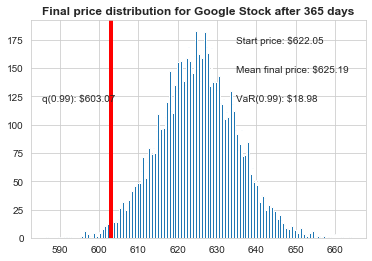

In [176]:
q = np.percentile(simulations,1)

plt.hist(simulations,bins=200)

plt.figtext(0.6,0.8,s="Start price: $%.2f" %start_price)

plt.figtext(0.6,0.7,"Mean final price: $%.2f" % simulations.mean())

plt.figtext(0.6,0.6,"VaR(0.99): $%.2f" % (start_price -q,))

plt.figtext(0.15,0.6, "q(0.99): $%.2f" % q)

plt.axvline(x=q, linewidth=4, color='r')

plt.title(u"Final price distribution for Google Stock after %s days" %days, weight='bold')